In [25]:
import pandas as pd

file_path = r"C:\Users\abdel\Downloads\CC GENERAL.csv"
data = pd.read_csv(file_path)
data['CUST_ID'] = data['CUST_ID'].str.replace('C', '')
data.fillna(data.mean(), inplace=True)
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


To determine the appropriate customer segmentation for defining a marketing strategy, we should consider the characteristics of the dataset and the business goals. Here are a few potential customer segments based on the features in the dataset.

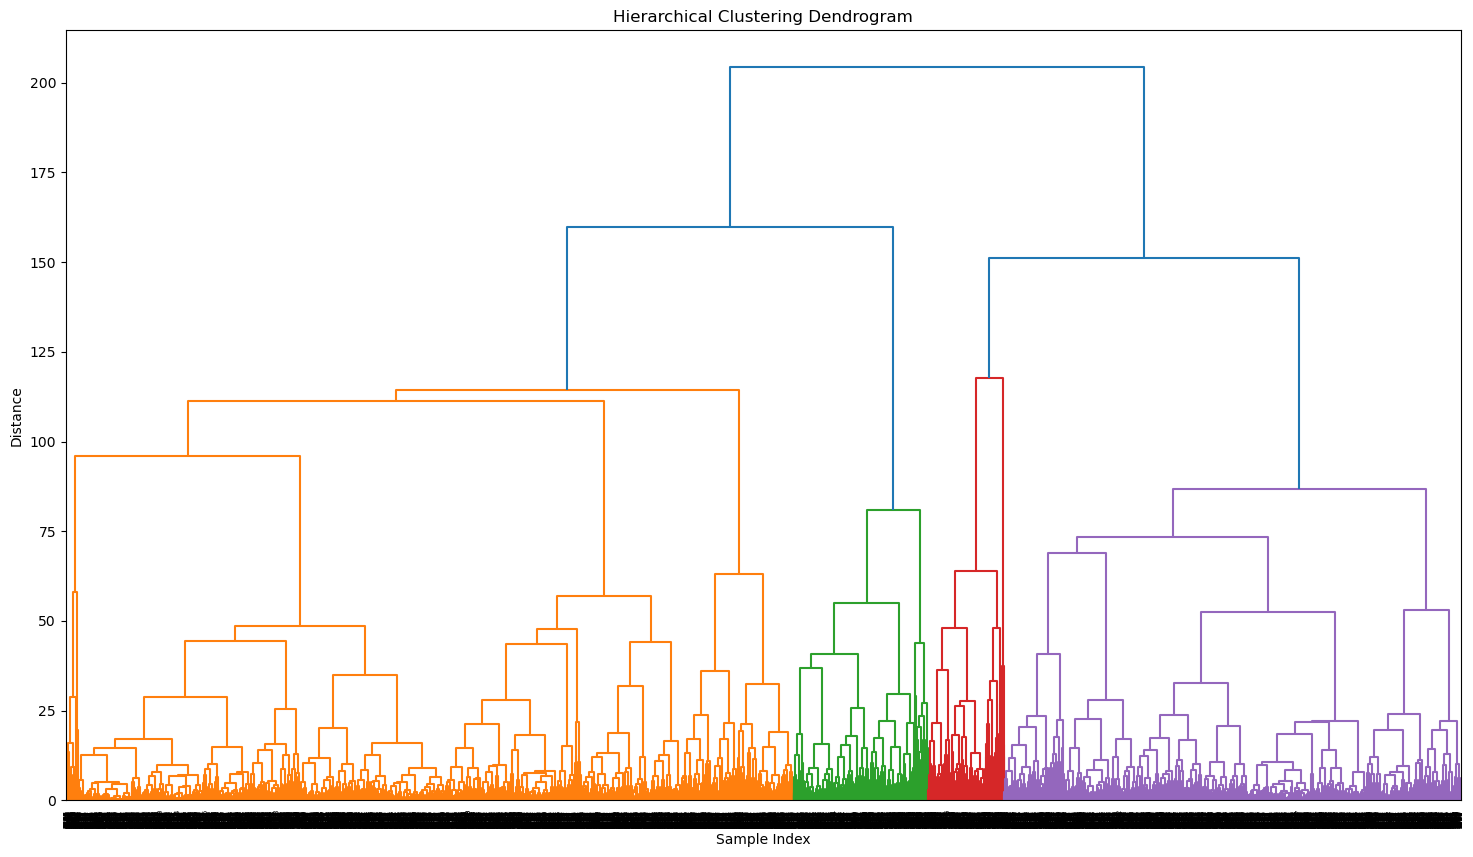

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


features = data.drop(['CUST_ID'], axis=1)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)

linked = linkage(scaled_data, method='ward')

plt.figure(figsize=(18, 10))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


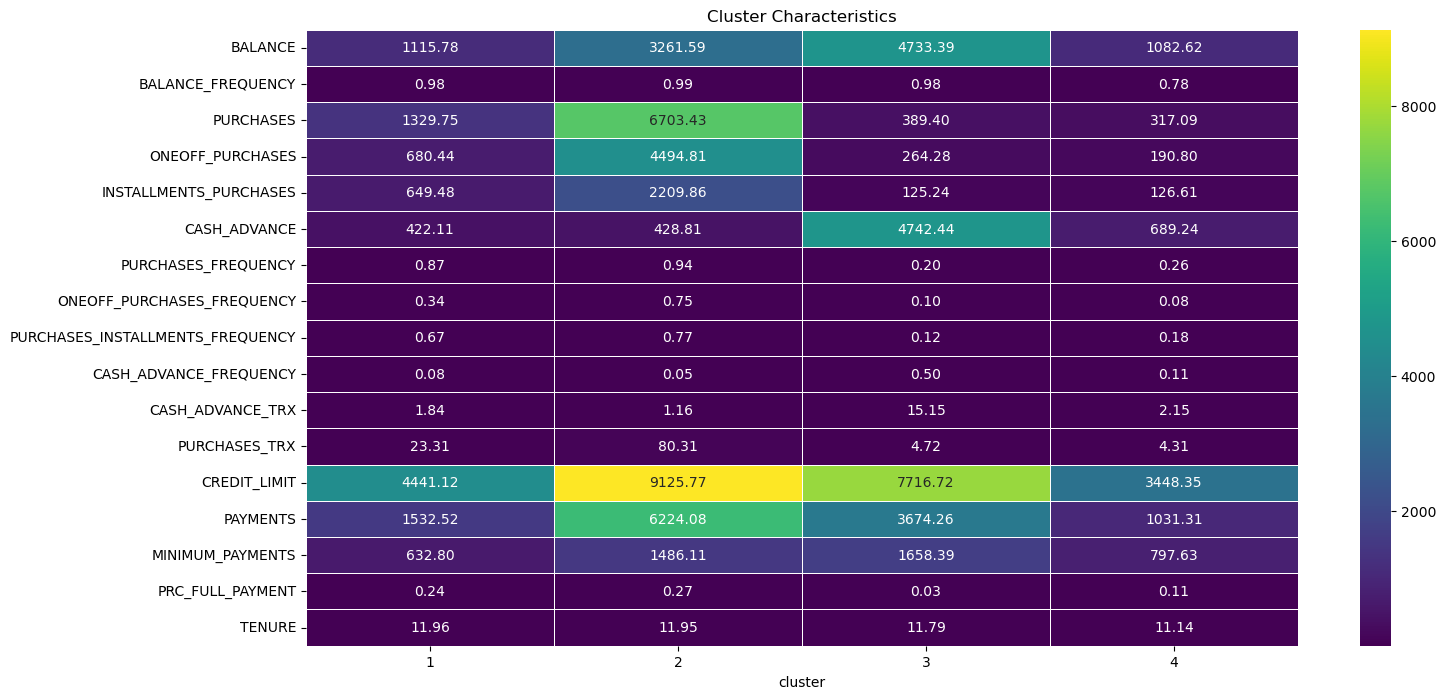

In [48]:
data = data.apply(pd.to_numeric, errors='coerce')

threshold = 150 
cluster_labels = fcluster(linked, threshold, criterion='distance')

data['cluster'] = cluster_labels

cluster_summary = data.groupby('cluster').mean()

plt.figure(figsize=(16, 8))
sns.heatmap(cluster_summary.T, cmap='viridis', annot=True, fmt=".2f", linewidths=.5)
plt.title('Cluster Characteristics')
plt.show()


# Interpretation
| Cluster | Average Balance | Average Purchases | Average Cash Advance | Purchases Frequency | Cash Advance Frequency | Credit Limit | Payments | Minimum Payments | Full Payment Percentage | Tenure |
|---------|-----------------|---------------------|------------------------|----------------------|------------------------|--------------|----------|-------------------|-------------------------|--------|
| 1       | Moderate balance | Moderate purchases | Low cash advance | Moderate frequency | Low cash advance usage | Moderate credit limit | Regular payments | Low minimum payments | Low full payment percentage | Average tenure |
| 2       | High balance | High purchases | Low cash advance | High frequency | Low cash advance usage | High credit limit | High payments | Low minimum payments | Moderate full payment percentage | Average tenure |
| 3       | Very high balance | Low purchases | Very high cash advance | Low frequency | Very high cash advance usage | High credit limit | Moderate payments | High minimum payments | Very low full payment percentage | Average tenure |
| 4       | Low balance | Low purchases | Moderate cash advance | Low frequency | Low to moderate cash advance usage | Moderate credit limit | Low payments | Moderate minimum payments | Low to moderate full payment percentage | Below-average tenure |

**Potential Marketing Segments and Strategies:**

1. **Cluster 1 (Moderate Users):**
   - **Business Context:** These customers maintain a moderate balance, make moderate purchases, and use cash advances infrequently.
   - **Marketing Strategy:** Target them with promotions to increase purchase frequency. Provide incentives for full payments to improve the full payment percentage.

2. **Cluster 2 (High Spenders):**
   - **Business Context:** High-balance customers with frequent high-value purchases and low cash advance usage.
   - **Marketing Strategy:** Offer exclusive rewards, premium services, or credit limit upgrades to encourage continued high-value purchases. Focus on loyalty programs.

3. **Cluster 3 (Cash Advance Users):**
   - **Business Context:** Customers with very high balances, low purchase activity, and a tendency to use a significant amount of cash advances.
   - **Marketing Strategy:** Offer promotions to encourage more purchases and reduce reliance on cash advances. Provide financial education to help manage cash advances more effectively.

4. **Cluster 4 (Low Activity Users):**
   - **Business Context:** Customers with low balances, infrequent purchases, and moderate cash advance usage.
   - **Marketing Strategy:** Encourage more frequent purchases through targeted promotions. Offer credit limit increases for responsible users to boost activity.